### 1. "누비자.csv"파일은 주소지별로 보유 누비자 자전거 대수, 설치시기, 위도경도를  나타내는 파일이다.
###      아래의 질문에 해당하는 코드를 작성하시오

In [8]:
import chardet
import pandas as pd
data = pd.read_csv('기말모음/2022/누비자.csv', encoding='EUC-KR')
data

,번호,터미널명,구,동,주소,등록일자,보관대수,위도,경도
0,1,동읍동중학교 앞,의창구,동읍,경남 창원시 의창구 동읍 신방리 871-6 수로,2011-08-04,16,35.291246,128.675877
1,2,동읍보건지소,의창구,동읍,경남 창원시 의창구 동읍 용잠리 230-7 대,2009-05-14,15,35.279618,128.688719
2,3,동읍주민복지관,의창구,동읍,경남 창원시 의창구 동읍 용잠리 687),2021-07-27,15,35.283956,128.681827
3,4,자여민원센터,의창구,동읍,경남 창원시 의창구 동읍 송정리 98-21,2009-05-14,10,35.277152,128.700567
4,5,주남저수지 주차장,의창구,동읍,경남 창원시 의창구 동읍 월잠리 303-7,2019-10-15,15,35.306059,128.678244
...,...,...,...,...,...,...,...,...,...
278,279,용원공영주차빌딩,진해구,웅동2동,경남 창원시 진해구 용원동 1219-1,2020-02-13,15,35.100001,128.814410
279,280,용원동 애플타운상가 옆,진해구,웅동2동,경남 창원시 진해구 용원동 1359,2020-09-11,18,35.088585,128.814102
280,281,용원하나로마트(맞은편),진해구,웅동2동,경남 창원시 진해구 용원동 1289,2015-06-14,17,35.100843,128.809458
281,282,웅2동 청안공원,진해구,웅동2동,경남 창원시 진해구 용원동 1207-1 공원,2011-08-05,11,35.103839,128.806651


#### 1-1. 창원시 구별 누비자 보관대수를 집계하고 이를 막대그래프로 시각화 하시오.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

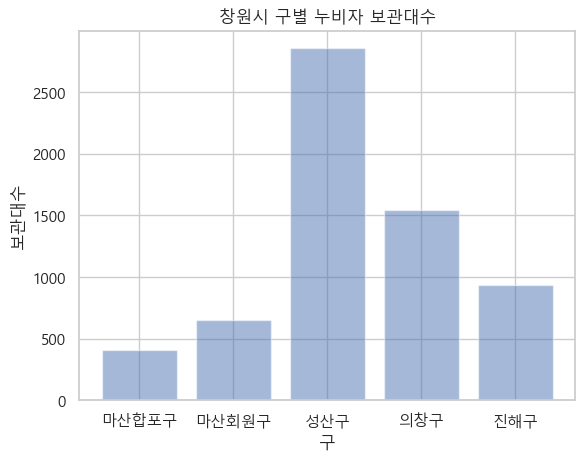

In [10]:
# 여기에 1-1번 문제 code를 작성하시오.
plt.rcParams['font.family'] = 'Malgun Gothic' 

keep_num = data.groupby('구')['보관대수'].sum()

num = keep_num.values.tolist()
gu =keep_num.index.tolist()

plt.bar(gu,num, alpha=0.5)
plt.xlabel('구')
plt.ylabel('보관대수')
plt.title('창원시 구별 누비자 보관대수')
plt.show()

#### 1-2. "등록일자" 컬럼을 년도(예를들어 2011)만 표시하는 "년도" 컬럼으로 바꾸시오.   "년도" 컬럼의 값도 정수값으로 변환하고 결과 DataFrame을 처음 10개만 출력하시오.   


In [11]:
# 여기에 1-2번 문제 code를 작성하시오.
data = data.rename(columns={'등록일자':'년도'})
data['년도'] = data['년도'].apply(lambda x: int(x[:4]))
data.head(10)

,번호,터미널명,구,동,주소,년도,보관대수,위도,경도
0,1,동읍동중학교 앞,의창구,동읍,경남 창원시 의창구 동읍 신방리 871-6 수로,2011,16,35.291246,128.675877
1,2,동읍보건지소,의창구,동읍,경남 창원시 의창구 동읍 용잠리 230-7 대,2009,15,35.279618,128.688719
2,3,동읍주민복지관,의창구,동읍,경남 창원시 의창구 동읍 용잠리 687),2021,15,35.283956,128.681827
3,4,자여민원센터,의창구,동읍,경남 창원시 의창구 동읍 송정리 98-21,2009,10,35.277152,128.700567
4,5,주남저수지 주차장,의창구,동읍,경남 창원시 의창구 동읍 월잠리 303-7,2019,15,35.306059,128.678244
5,6,감계공원,의창구,북면,경남 창원시 의창구 북면 감계리 237-1 (경남은행북면점앞),2018,10,35.301281,128.594201
6,7,감계덕산아내APT버스정류소옆,의창구,북면,경남 창원시 의창구 북면 감계리 740-2 (덕산아내버스정류소),2018,10,35.302350,128.590372
7,8,북면사무소,의창구,북면,경남 창원시 의창구 북면 신촌리 964-5 전,2010,10,35.348097,128.607609
8,9,북면족욕체험장,의창구,북면,경남 창원시 의창구 북면 신촌리 북면온천,2011,9,35.353290,128.611675
9,10,농협 서상동지점,의창구,의창동,경남 창원시 의창구 서상동 344-4,2009,15,35.262178,128.618327


#### 1-3. 최초 설치를 시작한 시작년도 부터 마지막 년도까지 보관대수를 누적하는 그래프를 그리시오  

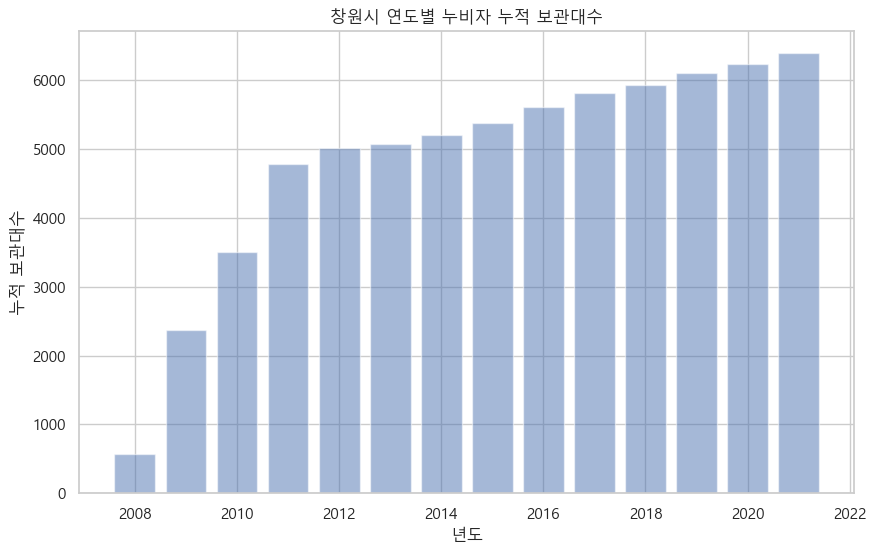

In [12]:
# 여기에 1-3번 문제 code를 작성하시오.
result = data.groupby('년도')['보관대수'].sum()

plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.figure(figsize=(10,6))
x = result.index.tolist()
y = result.values.tolist()
sum=0
sum_list = []
for i in  y:
    sum +=i
    sum_list.append(sum)

plt.bar(x,sum_list, alpha=0.5)
plt.xlabel('년도')
plt.ylabel('누적 보관대수')
plt.title('창원시 연도별 누비자 누적 보관대수')
plt.show()

### 2. "연월별외국인방문객.xlsx"파일은 2015년 1월부터 2023년 3월까지 외국인 입국자 통계를 보여주고 있다. 
###      아래의 질문에 해당하는 코드를 작성하시오

In [151]:
import pandas as pd
df = pd.read_excel('기말모음/2023/연월별외국인방문객.xlsx')
df

,Unnamed: 0,관광,상용,공용,유학연수,기타,전체
0,201501,723255,17686,3094,7752,165267,917054
1,201502,815138,14354,2256,36399,182559,1050706
2,201503,958493,18549,3241,27129,230732,1238144
3,201504,1112904,17326,4913,5556,243868,1384567
4,201505,1060730,19010,4679,9222,240571,1334212
...,...,...,...,...,...,...,...
95,202212,434305,6920,3702,9988,84358,539273
96,202301,312847,7645,4145,13674,96118,434429
97,202302,319098,7383,3165,53111,96491,479248
98,202303,627681,10543,4719,30743,126889,800575


#### 2-1. "관광", "상용", "공용", "유학연수", "기타", "전체" 컬럼의 외국인 입국자 수를 년도별로 집계한 DataFrame을 만들어 출력하시오. 
#### 단, 2023년은 1월부터 3월까지의 평균치를 4월에서 12월에 적용하시오. 

In [152]:
# 여기에 2-1번 문제 code를 작성하시오.
df['Unnamed: 0'] = df['Unnamed: 0'].str[:4]
df = df.rename(columns={'Unnamed: 0':'연도'})
df = df[:-1]

In [153]:
# 2023 4월 ~ 12월 데이터프레임 만들기

# 평균 테이블 구하기
df_4_12 = df[df['연도'] == '2023'].groupby('연도').mean()
#df_4_12 = df_4_12.astype(int) # 소수점 없애기
df_4_12 = df_4_12.reset_index()

# 4~12월 이어붙이기
for i in range(9):
    df = pd.concat([df,df_4_12], ignore_index=True)
    
df

,연도,관광,상용,공용,유학연수,기타,전체
0,2015,7.232550e+05,17686.000000,3094.000000,7752.000000,165267.000000,9.170540e+05
1,2015,8.151380e+05,14354.000000,2256.000000,36399.000000,182559.000000,1.050706e+06
2,2015,9.584930e+05,18549.000000,3241.000000,27129.000000,230732.000000,1.238144e+06
3,2015,1.112904e+06,17326.000000,4913.000000,5556.000000,243868.000000,1.384567e+06
4,2015,1.060730e+06,19010.000000,4679.000000,9222.000000,240571.000000,1.334212e+06
...,...,...,...,...,...,...,...
103,2023,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05
104,2023,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05
105,2023,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05
106,2023,4.198753e+05,8523.666667,4009.666667,32509.333333,106499.333333,5.714173e+05


In [154]:
df_year = df.groupby('연도').sum()
df_year = df_year.astype(int) # 소수점 없애기
df_year

,관광,상용,공용,유학연수,기타,전체
연도,,,,,,
2015,10135489,195325,48269,202708,2649860,13231651
2016,13932925,187507,51467,250716,2819208,17241823
2017,10415594,177071,54890,302652,2385551,13335758
2018,12414348,175547,61017,332011,2363956,15346879
2019,14432275,178445,74210,375661,2442165,17502756
2020,1653471,29509,16571,118462,701105,2519118
2021,211846,21290,18685,80084,635098,967003
2022,1998937,72170,35692,152195,939023,3198017
2023,5038504,102284,48116,390112,1277992,6857008


#### 2-2. 2-1번에서 구한 결과를 활용하여  "관광", "상용", "공용", "유학연수", "기타", "전체" 컬럼의 년도별 입국자수를 시각화 하시오. 
#### 전체 컬럼 수인 총 6개의 시각화 그림이 출력되도록 하시오. 


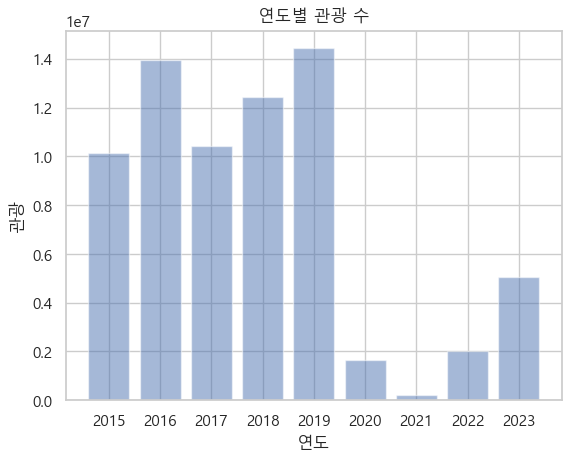

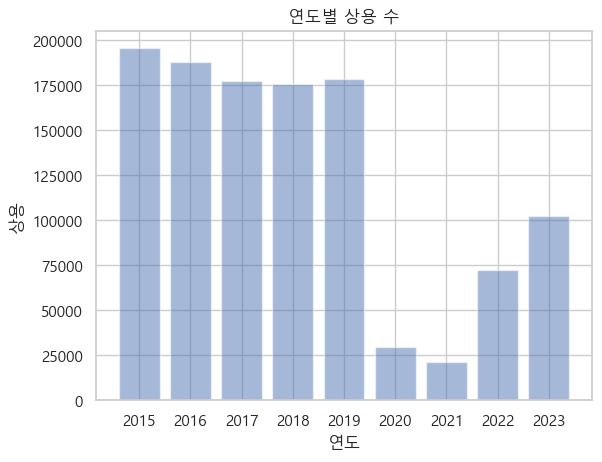

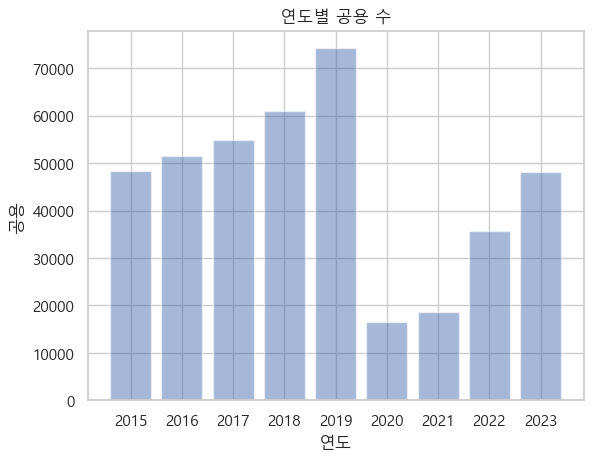

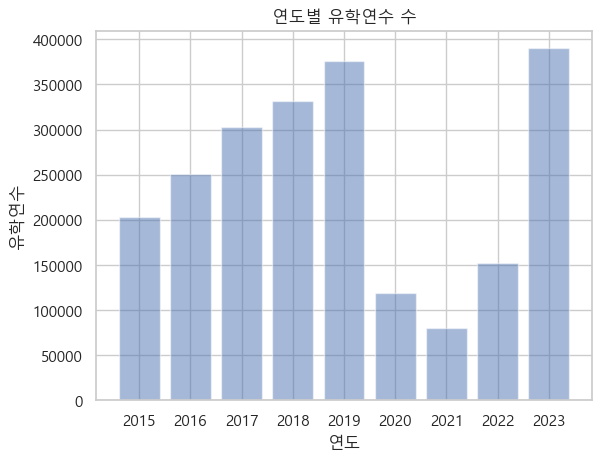

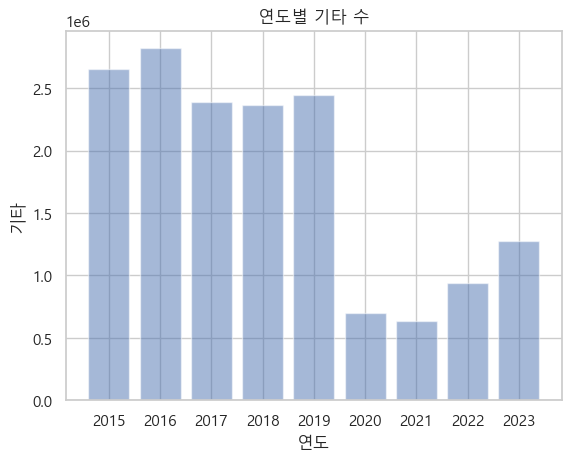

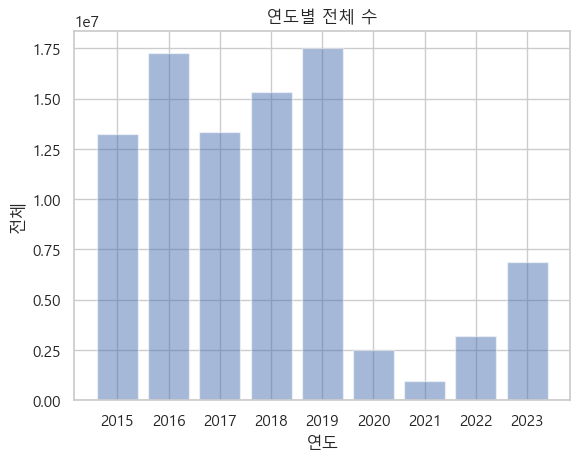

In [86]:
columns = df_year.columns.tolist()
x = df_year.index.tolist()

for column in columns:
    y = df_year[column]
    plt.bar(x,y,alpha=0.5)
    plt.xlabel('연도')
    plt.ylabel(f'{column}')
    plt.title(f'연도별 {column} 수')
    plt.show()

#### 2-3. 2020- 2022년도는 코로나로 인하여 입국자수가 급감한것을 확인할 수있다. 2015년 1월에서 2023년 3월까지 월별 전체 입국자수를 시각화 하고, 코로나 시작시점을 화살표, text 등 각자 사용한 가능한 시각화 tool을 이용하여 표시하고 결과를 제시하시오.  

In [148]:
# 여기에 2-3번 문제 code를 작성하시오.
import pandas as pd
df = pd.read_excel('기말모음/2023/연월별외국인방문객.xlsx')
df = df[:-1]
df = df.rename(columns={'Unnamed: 0':'날짜'})

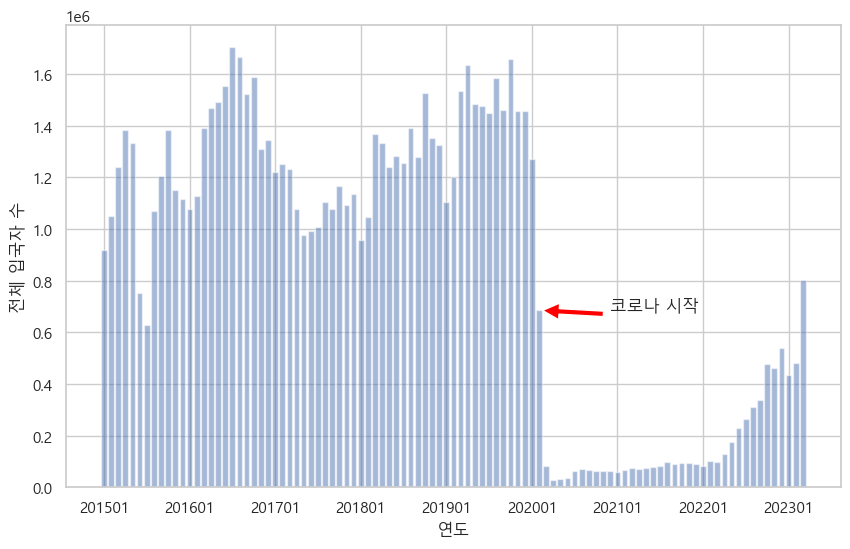

In [150]:
plt.figure(figsize = (10,6))
plt.rcParams['font.family'] = 'Malgun Gothic' 
x = df['날짜']
y = df['전체']

plt.bar(x,y,alpha=0.5)
plt.xticks(x[::12])

x_pos = x[x == '202002'].index.tolist()[0]
y_pos = df[df['날짜']=='202002'].전체.values.tolist()[0]
plt.annotate('코로나 시작', 
             xy=(x_pos, y_pos), 
             xytext=(x_pos+10,y_pos + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.xlabel('연도')
plt.ylabel('전체 입국자 수')
plt.title('')
plt.show()